In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns
from matplotlib.pyplot import figure
import cmocean.cm as cmo
import seaborn as sns

In [2]:
df = pd.read_csv('../Dissertation_projects/Absorption_experiments/Data/Data_output_DO_experiments_1.csv', sep=',', index_col=0)
df['wl'] = df.index.astype(float)
df = df.drop('0204172400B', axis=1)

df_meta = pd.read_csv('../Dissertation_projects/Absorption_experiments/Data/Data_output_Meta.csv', sep=',', index_col=0)




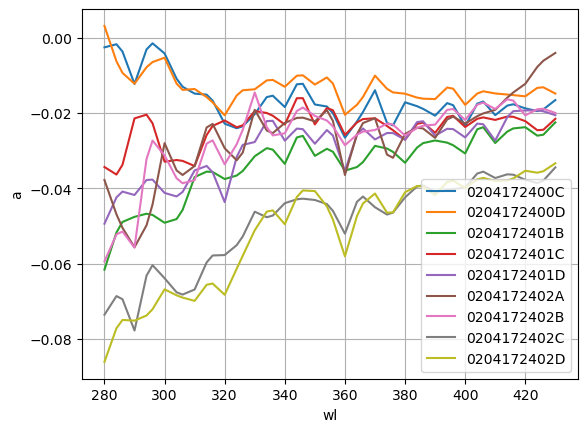

In [3]:
# Plotting each column against 'wl'
for column in df.columns:
    if column != 'wl':  # Skip 'wl' column
        plt.plot(df['wl'], df[column], label=column)

plt.xlabel('wl')
plt.ylabel('a')
plt.title('')
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


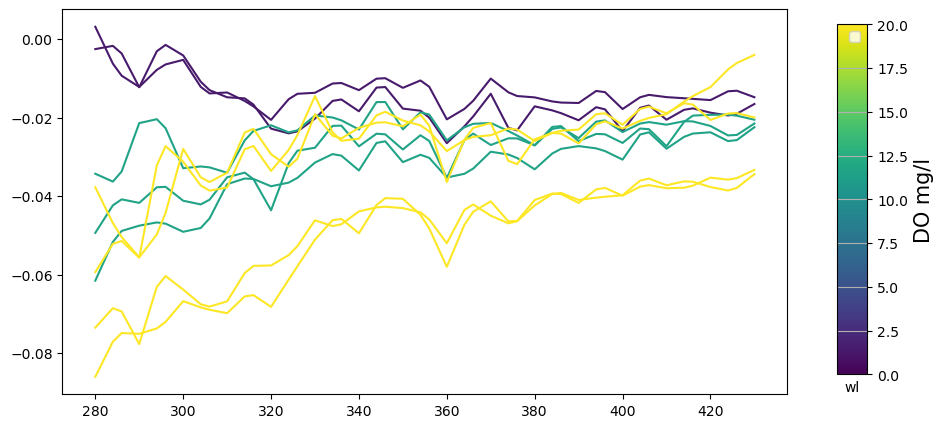

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
for column in df.columns:
    if column != 'wl':
        color = df_meta.loc[column, 'DO'].astype(float)  # Get color from metadata
        color_normalized = (color - 0) / (20 - 0)  # Normalize color to range [0, 1]
        color_mapped = plt.cm.viridis(color_normalized)  # Map normalized color to colormap
        axes.plot(df['wl'], df[column], label=column, color=color_mapped)
        
# Add a color bar for the depth on the right side of the figure
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=20)), cax=cbar_ax)
cbar.ax.set_ylabel('Depth', size=15)

plt.xlabel('wl')
plt.ylabel('DO mg/l')
plt.title('')
plt.legend()
plt.grid(True)
plt.show()



In [12]:
df = pd.read_csv('../Dissertation_projects/Absorption_experiments/Data/Data_output_repeat_sample.csv', sep=',', index_col=0)
# Calculate RMSE and mean for each row
df['rmse'] = np.sqrt(((df.sub(df.mean(axis=1), axis=0)) ** 2).mean(axis=1))
df['mean'] = df.mean(axis=1)
df['mean_up'] = df['mean'] + df['rmse']
df['mean_down'] = df['mean'] - df['rmse']

df['wl'] = df.index.astype(float)
df

,Sample100,Sample101,Sample102,Sample103,Sample104,Sample105,Sample106,Sample107,Sample108,Sample109,...,Sample120,Sample121,Sample122,Sample123,Sample124,rmse,mean,mean_up,mean_down,wl
wl,,,,,,,,,,,,,,,,,,,,,
280,-0.010640,-0.013265,-0.004122,-0.007301,-0.002602,-0.010456,-0.002372,-0.002487,-0.003823,0.003109,...,-0.020312,-0.008774,-0.006587,-0.004652,-0.011907,0.005113,-0.006005,-0.000892,-0.011117,280.0
282,-0.002202,-0.004578,0.003708,-0.002621,0.003957,-0.006338,0.005412,-0.001013,0.006412,0.004408,...,-0.006623,-0.003726,-0.003095,0.001299,-0.005587,0.004121,-0.000322,0.003799,-0.004443,282.0
284,0.006237,0.004109,0.011538,0.002059,0.010515,-0.002220,0.013196,0.000461,0.016646,0.005707,...,0.007066,0.001322,0.000396,0.007250,0.000732,0.004910,0.005430,0.010340,0.000520,284.0
286,0.010902,0.009258,0.013003,0.003938,0.014177,0.000700,0.015052,0.001879,0.017696,0.004311,...,0.013979,0.003998,0.003137,0.009977,0.004256,0.004774,0.007771,0.012545,0.002997,286.0
288,0.011796,0.010870,0.008102,0.003017,0.014942,0.002423,0.010981,0.003243,0.009562,0.000221,...,0.014117,0.004302,0.005126,0.009479,0.004984,0.004064,0.006716,0.010781,0.002652,288.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,-0.000101,0.000382,-0.000166,0.000626,0.001806,0.001377,0.001027,0.000216,-0.000147,0.000714,...,-0.001276,0.001916,-0.000958,-0.000332,0.000668,0.001052,0.000178,0.001230,-0.000873,422.0
424,-0.001032,-0.000594,0.001280,-0.000820,0.001400,0.000382,0.000005,-0.000281,-0.000940,0.000852,...,-0.001607,0.001990,-0.001363,-0.001631,0.000253,0.001166,-0.000268,0.000898,-0.001433,424.0
426,-0.001350,-0.000668,0.001377,-0.001400,0.001082,-0.000253,-0.000843,-0.000258,-0.001161,0.000921,...,-0.002220,0.001175,-0.001603,-0.002215,-0.000005,0.001067,-0.000505,0.000562,-0.001572,426.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


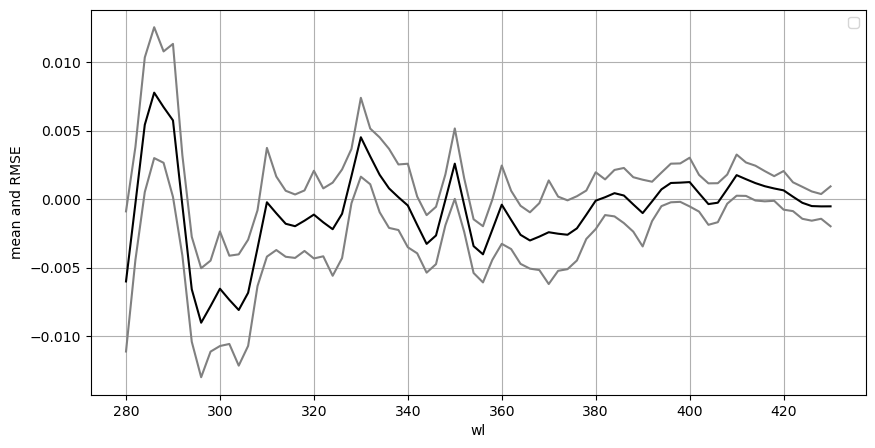

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axes.plot(df['wl'], df['mean'], color = 'black')
axes.plot(df['wl'], df['mean_up'], color = 'grey')
axes.plot(df['wl'], df['mean_down'],  color = 'grey')
        
plt.xlabel('wl')
plt.ylabel('mean and RMSE')
plt.title('')
plt.legend()
plt.grid(True)
plt.show()
